# COVID-19 - Clinical Data to assess diagnosis

Data Science Research Group
    WHZ - University of Applied Sciences, Prof. Dr. Mike Espig



<img src="../data/corona.jpg" width=50%>

[Image source:](https://lebertransplantation.eu/home/details/news/covid-19/?tx_news_pi1%5Bcontroller%5D=News&tx_news_pi1%5Baction%5D=detail&cHash=abe167b8cf5ca287c5f577b6e6d6c1af)

## Content
<a id="content"></a>

* [Additional packages](#install)
* [Introduction](#report)
* [Context and call to action](#context)
* [Data set Information](#data)
___
* [Imports](#Imports)
* [Data exploration](#data_exp)
    * [Variables and variable identification](#var)
    * [Variable Encoding](#Encoding)
    * [Target variable](#Target)
    * [Drop duplicate columns](#Drop-duplicate-cols)
    * [Distributions](#dist)
        * [Data description with pandas profile](#data-description-with-pandas-profile)
        * [How many patients need ICU and when](#how-many-patients-need-when-ICU)
    * [Correlations](#Correlations)
        * [Most correlated features](#most-correlated)
        * [Correlation for selected features](#correlation-for-selected-features)
        
    * [Transform dataframe into multiindex dataframe](#transform-dataframe-into-multiindex-dataframe)
        * [Example how to get a value](#example-how-to-get-a-data-instance)
        * [Example how to get a data slice](#example-how-to-get-a-data-slice)
    * [Missing values](#missing-values)
        * [Nan-Matrix](#nanmat)

* [Preprocessing](#preprocessing)
    * [Missing value imputation](#imputation)

* [Base model](#premodel)
    * [ICU_final](#ICU_final)
    * [ICU_next](#ICU_next)
    
* [Feature cleaning](#fc)



COVID-19 pandemic impacted the whole world, overwhelming healthcare systems - unprepared for such intense and lengthy request for ICU beds, professionals, personal protection equipment and healthcare resources.
Brazil recorded first COVID-19 case on February 26 and reached community transmission on March 20.

**Sírio-Libanês hospital, São Paulo**

<img src="https://d2dxldo5hhj2zu.cloudfront.net/img/983x,jpeg/https://d3043uog1ad1l6.cloudfront.net/uploads/2019/08/hospital-sirio-libanes-fachada.jpeg" width=50%>


[Image source:](https://www.sanarmed.com/residencia-medica-hospital-sirio-libanes-2020-inscricoes-abertas)



The Hospital Sírio-Libanês (Syrian-Lebanese Hospital) is one of the most important hospitals in Brazil and South America. The hospital was founded by the large Syrian and Lebanese community of São Paulo in 1921. It is one of the most well-known health facilities in Brazil due to the high quality of care, [wiki](https://en.wikipedia.org/wiki/Hospital_S%C3%ADrio-Liban%C3%AAs).



<a id="context"></a>

## [Context and call to action](#content)


COVID-19 pandemic impacted the whole world, overwhelming healthcare systems - unprepared for such intense and lengthy request for ICU beds, professionals, personal protection equipment and healthcare resources.
Brazil recorded first COVID-19 case on February 26 and reached community transmission on March 20.


There is urgency in obtaining accurate that to better predict and prepare healthcare systems and avoid collapse, defined by above capacity need of ICU beds (assuming human resources, PPE and professionals are available), using individual clinical data - in lieu of epidemiological and populational data.


<img src="https://img.medscape.com/thumbnail_library/cdc_200313_flatten_the_curve_800x450.jpg" width=50%>

[Image source:](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

<a id="task_01"></a>

## [Task 01](#content)

Predict admission to the ICU of confirmed COVID-19 cases.
Based on the data available, is it feasible to predict which patients will need intensive care unit support?
The aim is to provide tertiary and quarternary hospitals with the most accurate answer, so ICU resources can be arranged or patient transfer can be scheduled.


<a id="task_02"></a>

## [Task 02](#content)

Predict NOT admission to the ICU of confirmed COVID-19 cases.
Based on the subsample of widely available data, is it feasible to predict which patients will need intensive care unit support?
The aim is to provide local and temporary hospitals a good enough answer, so frontline physicians can safely discharge and remotely follow up with these patients.



<a id="data"></a>

## [Data set Information](#content)

The COVID-19 pandemic has affected millions of individuals and caused hundreds of thousands of deaths worldwide. Predicting mortality among patients with COVID-19 who present with a spectrum of complications is very difficult, hindering the prognostication and management of the disease. We aimed to develop an accurate prediction model of COVID-19 mortality using unbiased computational methods, and identify the features most predictive of this outcome, [see](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset).


**Label output**

ICU should be considered, as the first version of this dataset, the target variable.

**Window Concept**

We were carefull to include real life cenarios of with window of events and available data.
Data was obtain and grouped

* patient
    * patient encounter
    * aggregated by windows in chronological order
        |Window | Description|
        | --- | --- |  
        |0-2|From 0 to 2 hours of the admission|
        |2-4|From 2 to 4 hours of the admission|
        |4-6|From 4 to 6 hours of the admission|
        |6-12|From 6 to 12 hours of the admission|
        |Above-12|Above 12 hours from admission|
* Beware NOT to use the data when the target variable is present, as it is unknown the order of the event (maybe the target event happened before the results were obtained). They were kept there so we can grow this dataset in other outcomes latter on.        

**Examples:**

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media" width=50%>

[Image source:](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media" width=50%>

[Image source:](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)


**Dataset**

This dataset contains anonymized data from Hospital Sírio-Libanês, São Paulo and Brasilia. All data were anonymized following the best international practices and recommendations.
Data has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1.

**Available data**

1. Patient demographic information (03)
2. Patient previous grouped diseases (09)
3. Blood results (36)
4. Vital signs (06)

In total there are 54 features, expanded when pertinent to the mean, median, max, min, diff and relative diff.

* diff = max - min
* relative diff = diff/median


**Questions and information**

Please use the kernels and the discussion, as Sírio-Libanês Data Intelligence Team will be replying to questions.
Additional questions, corporate and clarifications: [data.intelligence@hsl.org.br](data.intelligence@hsl.org.br).


<a id="Imports"></a>
# [<ins>Imports</ins>](#content)

In [1]:
# !conda install -c conda-forge category_encoders -y 
# !conda install -c conda-forge mlxtend -y 
# !conda install -c districtdatalabs yellowbrick -y 
# !conda install -c anaconda xlrd -y 

In [2]:
#!pip install discrete-optimization-extension --extra-index-url https://pip.dsrg.fh-zwickau.de
#!pip install bias-variance-agent --extra-index-url https://pip.dsrg.fh-zwickau.de 
# !pip install bias-variance-agent=='0.1.0.dev1' --extra-index-url https://pip.dsrg.fh-zwickau.de
#!pip install imblearn
#!pip install jutils with pip install --extra-index-url https://pip.dsrg.fh-zwickau.de

In [3]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import warnings
import sklearn
import yellowbrick as yb
import biva
import biva.utils as utils
import biva.preprocessing.selection as selection
import klib
import os

from biva.preprocessing.selection import get_numerical_cols
from biva.agent import Agent 
from jutils.plot import Plot
from jutils.html import HBox

%matplotlib inline
%config Completer.use_jedi = False

# pd.set_option('display.max_columns', 500)
warnings.simplefilter('ignore')

# Increase width of cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all df columns
pd.set_option('display.max_columns', None)

In [5]:
#data = pd.read_excel(
#    r'E:\Users\Home\Documents\Data_Sciense_Research_Group\Projekt_Covid19\data\data_Sirio_Libanes_ICU_Prediction.xlsx')

# data = pd.read_excel('../datasets/healthcare/covid_19/Sirio_Libanes_ICU_Prediction.xlsx')
data = pd.read_excel('./data/Sirio_Libanes_ICU_Prediction.xlsx')

# ID rename
data.rename(columns={'PATIENT_VISIT_IDENTIFIER': 'PATIENT_ID'}, inplace=True)
df = data.copy()
data

,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<a id="data_exp"></a>
# [<ins>__Data exploration__</ins>](#content)

<a id="var"></a>
## [<ins>Variables and variable identification</ins>](#content)

In [6]:
constant_var_list = selection.get_constant_features(data, 1.0)
# Drop constant features
df.drop(constant_var_list, 1, inplace=True)

str_var_list = selection.get_categorical_cols(data)
num_var_list = selection.get_numerical_cols(data)

print("Constant attributes: ", constant_var_list)
print("String attributes: ", str_var_list) # string type
print("Number of Numeric attributes: ", len(num_var_list)) # numeric type

Constant attributes:  ['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF']
String attributes:  ['AGE_PERCENTIL', 'WINDOW']
Number of Numeric attributes:  229


<a id ='Encoding'></a>
## [Encoding](#content)

Encode categorical variables so that we can explore thier correlations and distributions.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoding the AGE variable
age_perc_enc = le.fit_transform(df['AGE_PERCENTIL']) + 1
age_perc_enc_dict = {k:v+1 for k,v in zip(le.classes_, range(len(le.classes_)))}
df['AGE_PERCENTIL'] = age_perc_enc

# Encoding the WINDOW variable
le = LabelEncoder()
window_enc = le.fit_transform(data['WINDOW']) + 1
window_enc_dict = {k:v+1 for k,v in zip(le.classes_, range(len(le.classes_)))}
df['WINDOW'] = window_enc

df[str_var_list].head()

,AGE_PERCENTIL,WINDOW
0,6,1
1,6,2
2,6,3
3,6,4
4,6,5


<a id='Target'></a>
## [Target variable](#content)

First step is to model a target variable, so that we can analyse it's correlations with other features.

### `ICU_final` tells us if the patient **eventually** was sent to the ICU. 
Presumably it's easier to build Model that maps this target, but it's of lower importance to the clinic. 

In [8]:
ICU_final = df.groupby('PATIENT_ID').ICU.max().to_frame().rename(columns={"ICU":"ICU_final"})
pd.merge(data.iloc[:, [0, -1, -2]], ICU_final, on='PATIENT_ID').query("ICU_final == 1").iloc[15:30]

,PATIENT_ID,ICU,WINDOW,ICU_final
55,11,0,0-2,1
56,11,0,2-4,1
57,11,0,4-6,1
58,11,1,6-12,1
59,11,1,ABOVE_12,1
65,13,0,0-2,1
66,13,0,2-4,1
67,13,0,4-6,1
68,13,0,6-12,1
69,13,1,ABOVE_12,1


In [9]:
df = pd.merge(df, ICU_final, on='PATIENT_ID')

Check

In [10]:
df.loc[df['ICU_final'].isna(), ['PATIENT_ID', 'ICU','ICU_final']]

,PATIENT_ID,ICU,ICU_final


### `ICU_next` tells us if patient is going to be sent to the ICU during next `WINDOW`.

We 

In [11]:
df['ICU_next'] = data.groupby('PATIENT_ID').ICU.shift(-1)
start = 55
df.loc[start:start+14, ['PATIENT_ID', 'ICU','ICU_final', 'ICU_next']]

,PATIENT_ID,ICU,ICU_final,ICU_next
55,11,0,1,0.0
56,11,0,1,0.0
57,11,0,1,1.0
58,11,1,1,1.0
59,11,1,1,NaN
60,12,0,0,0.0
61,12,0,0,0.0
62,12,0,0,0.0
63,12,0,0,0.0
64,12,0,0,NaN


<a id='Drop-duplicate-cols'></a>
## [Drop duplicates columns](#content)

In [12]:
df_clean = df.T.drop_duplicates().T
clean_cols = df_clean.columns.to_list()
dropped_cols = sorted(set(data.columns) - set(clean_cols))
# dropped_cols

In [13]:
sufixes = ['MIN', 'MAX', 'MEAN', 'MEDIAN', 'DIFF']
dropped_cols_dict = {}

for sufix in sufixes:
    dropped_pref_cols = sorted([col for col in dropped_cols if col.endswith('_' + sufix)])
    dropped_cols_dict[sufix] = dropped_pref_cols
    print(f'{len(dropped_pref_cols)} cols with {sufix} sufix are dropped')
    
print(f'Dropped {len(dropped_cols)} in total')
df = df_clean.copy()

36 cols with MIN sufix are dropped
36 cols with MAX sufix are dropped
36 cols with MEAN sufix are dropped
0 cols with MEDIAN sufix are dropped
36 cols with DIFF sufix are dropped
Dropped 144 in total


In [14]:
# klib.missingval_plot(df_clean)

<a id='Distributions'></a>
## [DISTRIBUTUONS](#content)

<a id='data-description-with-pandas-profile'></a>
### [<ins>Data description with Pandas_profile</ins>](#content)

Set up a pandas profile repot. For the api see https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/advanced_usage.html

In [15]:
# profile = df.profile_report(
#      title="Report without correlations",
#     # choice correlation plots 
#      correlations={
#          "pearson": {"calculate": True}, 
#          "spearman": {"calculate": False},
#          "kendall": {"calculate": False},
#          "phi_k": {"calculate": False},
#          "cramers": {"calculate": False},
#      },
#     interactions={"continuous":False}
#  )

# # save the report as html-file
# profile.to_file(output_file='COVID19_DATASET_Profile.html')

#### See COVID19_DATASET_Profile.html

<a id ='how-many-patients-need-when-ICU'></a>
### [<ins>How many patients need ICU and when<ins>](#content)

In [16]:
icu_windows = data.groupby(['WINDOW'])['ICU'].agg(['count','mean'])
# remane mean
icu_windows['ICU_final'] = icu_windows['count'] * icu_windows['mean']
icu_windows

,count,mean,ICU_final
WINDOW,,,
0-2,385,0.083117,32.0
2-4,385,0.153247,59.0
4-6,385,0.257143,99.0
6-12,385,0.337662,130.0
ABOVE_12,385,0.506494,195.0


### Windows, Age

In [17]:
window_value_counts = data['WINDOW'].value_counts().sort_index().to_frame().plot.bar().get_figure()
age_precentile_counts = data['AGE_PERCENTIL'].value_counts().sort_index().to_frame().plot.bar().get_figure()

HBox( [ Plot(age_precentile_counts), Plot(window_value_counts) ], css = { 'height': '22em', 'column-gap': '2em' } )

Note: The number of non binary numerical features is very large (75), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.
Dropped 1104 missing values from column ALBUMIN_MEDIAN.
Dropped 1104 missing values from column BE_ARTERIAL_MEDIAN.
Dropped 1104 missing values from column BE_VENOUS_MEDIAN.
Dropped 1104 missing values from column BIC_ARTERIAL_MEDIAN.
Dropped 1104 missing values from column BIC_VENOUS_MEDIAN.
Dropped 1104 missing values from column BILLIRUBIN_MEDIAN.
Dropped 1104 missing values from column BLAST_MEDIAN.
Dropped 1104 missing values from column CALCIUM_MEDIAN.
Dropped 1104 missing values from column CREATININ_MEDIAN.
Dropped 1104 missing values from column FFA_MEDIAN.
Dropped 1104 missing values from column GGT_MEDIAN.
Dropped 1104 missing values from column GLUCOSE_MEDIAN.
Dropped 1104 missing values from column HEMATOCRITE_MEDIAN.
Dropped 1104 missing values from column HEMOGLOBIN_MEDIAN.
Drop

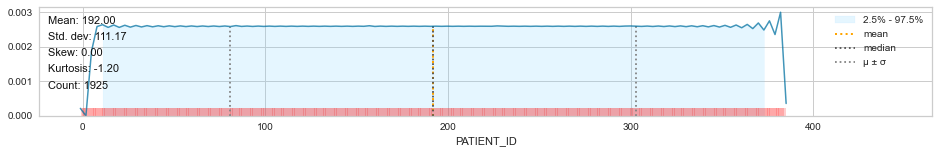

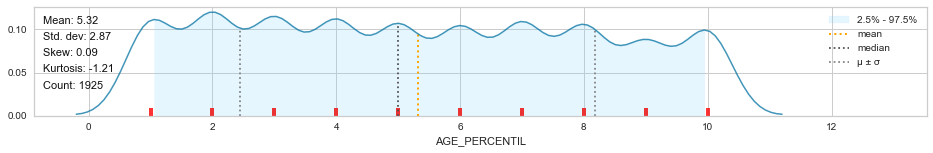

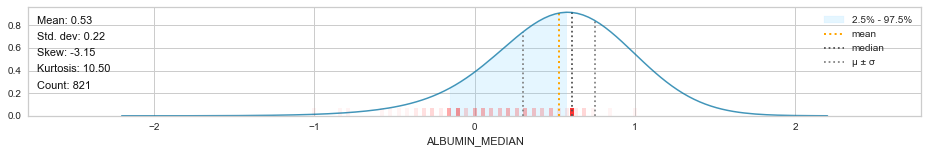

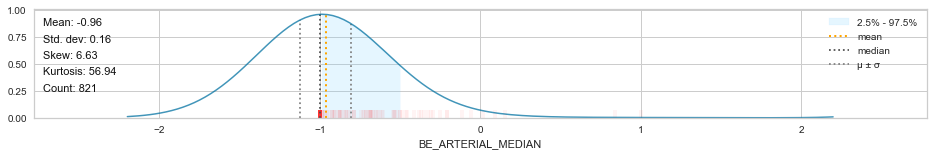

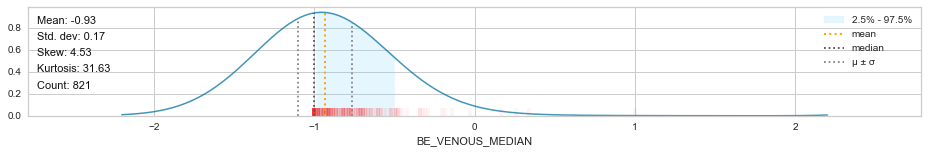

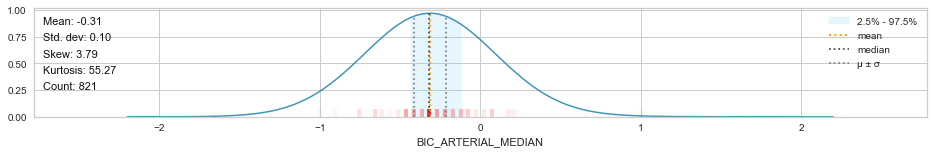

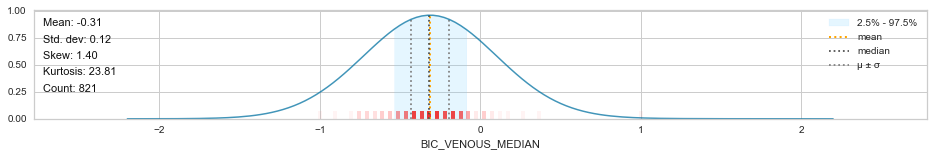

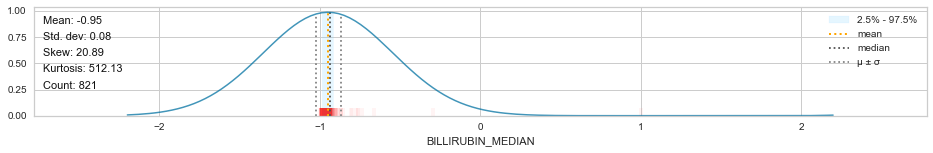

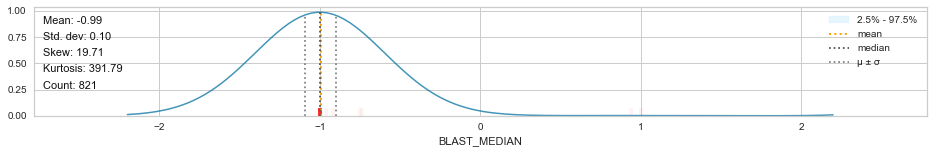

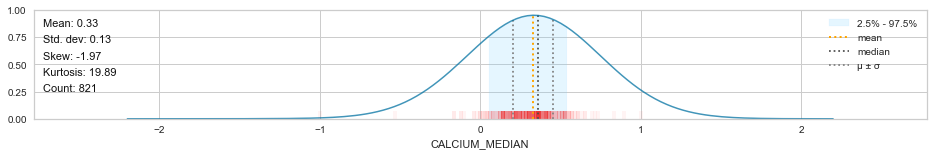

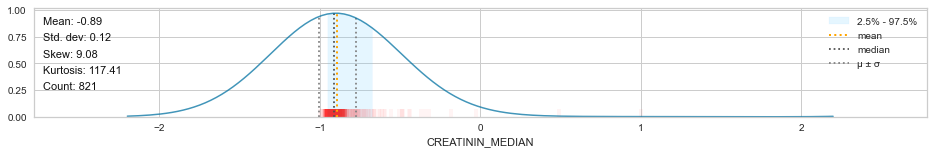

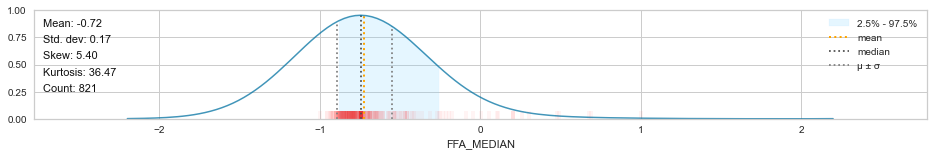

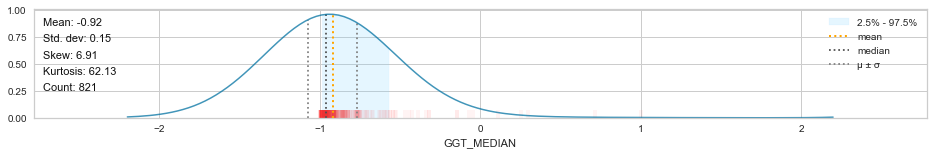

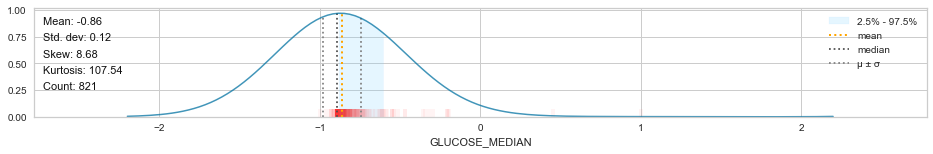

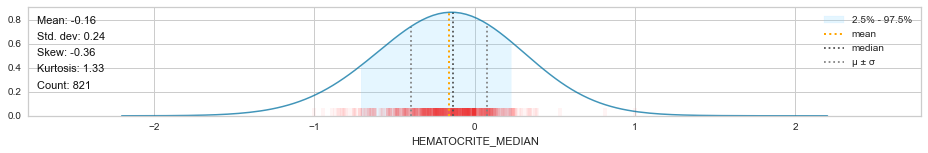

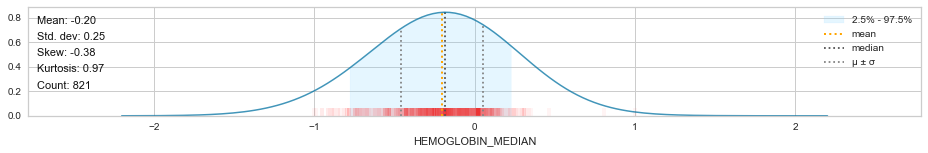

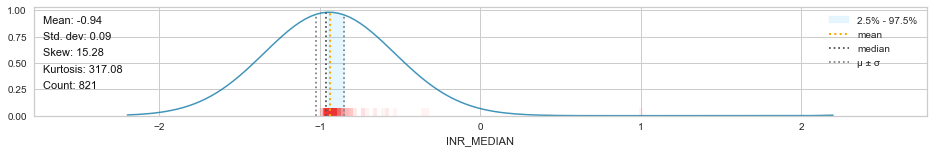

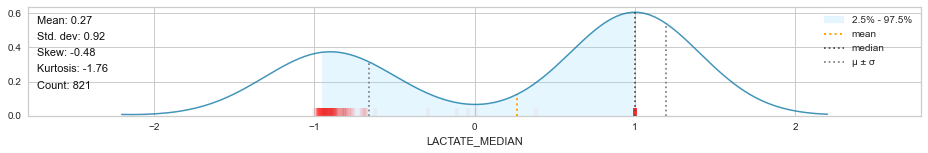

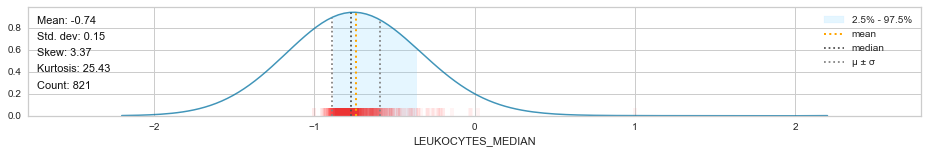

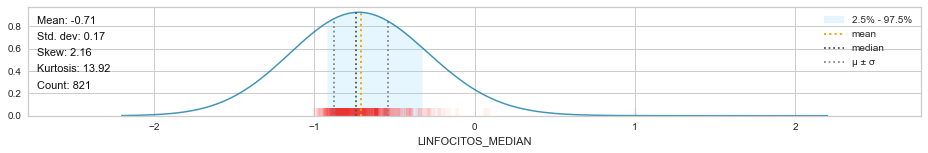

In [18]:
klib.dist_plot(df)

<a id='Correlations'></a>
## [<ins>Correlations</ins>](#content)

**There are also correlation plots inside the pandas profile report.**

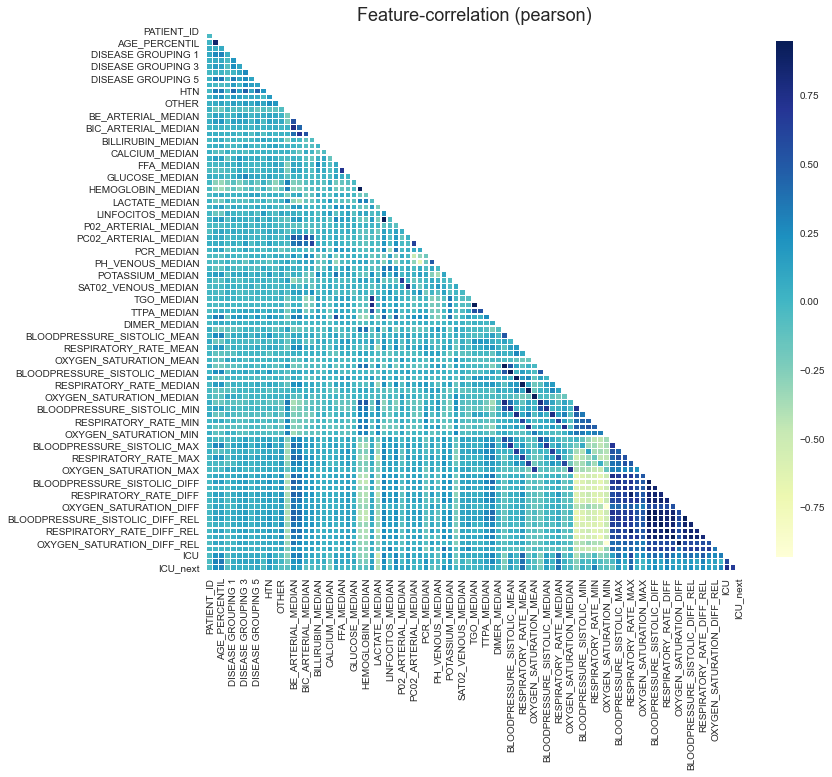

In [19]:
klib.corr_plot(df, cmap="YlGnBu", annot=False)

<a id='most-correlated'></a>
### [<ins>Most correlated features</ins>](#content)

In [20]:
from biva.preprocessing.selection import top_corr_features

In [21]:
# Get most correlated features
corrmat = df.corr()
topcorr_pairs = top_corr_features(corrmat=corrmat, thresh=0.8, mode='abs')
topcorr_features = sorted(set(sum(topcorr_pairs.index, ())))

print(f'{len(topcorr_features)} highly correlated features detected: \n')
topcorr_pairs

34 highly correlated features detected: 



TEMPERATURE_DIFF                  TEMPERATURE_DIFF_REL                0.999898
OXYGEN_SATURATION_DIFF            OXYGEN_SATURATION_DIFF_REL          0.999831
BLOODPRESSURE_SISTOLIC_DIFF       BLOODPRESSURE_SISTOLIC_DIFF_REL     0.991276
HEART_RATE_MEAN                   HEART_RATE_MEDIAN                   0.991238
RESPIRATORY_RATE_DIFF             RESPIRATORY_RATE_DIFF_REL           0.991107
BLOODPRESSURE_SISTOLIC_MEAN       BLOODPRESSURE_SISTOLIC_MEDIAN       0.990993
BLOODPRESSURE_DIASTOLIC_DIFF      BLOODPRESSURE_DIASTOLIC_DIFF_REL    0.988137
TEMPERATURE_MEAN                  TEMPERATURE_MEDIAN                  0.987056
BLOODPRESSURE_DIASTOLIC_MEAN      BLOODPRESSURE_DIASTOLIC_MEDIAN      0.986124
HEART_RATE_DIFF                   HEART_RATE_DIFF_REL                 0.983785
OXYGEN_SATURATION_MIN             OXYGEN_SATURATION_DIFF_REL          0.983653
                                  OXYGEN_SATURATION_DIFF              0.983435
HEMATOCRITE_MEDIAN                HEMOGLOBIN_MEDIAN 

## TODO: features `feature_DIFF_REL` and `feature_REL` are highly correlated. Decide which features to drop.

In [22]:
cols_diff_rel = sorted([col for col in topcorr_features if '_DIFF_REL' in col])
cols_diff_rel

['BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'HEART_RATE_DIFF_REL',
 'OXYGEN_SATURATION_DIFF_REL',
 'RESPIRATORY_RATE_DIFF_REL',
 'TEMPERATURE_DIFF_REL']

In [23]:
cols_diff = sorted({col for col in topcorr_features if '_DIFF' in col} - set(cols_diff_rel))
cols_diff

['BLOODPRESSURE_DIASTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'HEART_RATE_DIFF',
 'OXYGEN_SATURATION_DIFF',
 'RESPIRATORY_RATE_DIFF',
 'TEMPERATURE_DIFF']

<a id='correlation-for-selected-features'></a>
### [<ins>Correlation for selected features</ins>](#content)

In [24]:
def print_corr_values(target='ICU'):
    threshold = 0.7        
    for key in reversed(df.keys()):
        print(key,',')
        print(corrmat[key][(abs(corrmat[key])!=1) & (abs(corrmat[key])>=threshold)],
              f'\n{target} correlation:',corrmat[key][target],'\n',40*'=', '\n') 
        
# print_corr_values()

<a id= 'transform-dataframe-into-multiindex-dataframe'></a>
## [<ins>Transform dataframe into multiindex dataframe</ins>](#content)

In [25]:
def to_midx(df, cols):
    df = df.copy()
    iterables = [df[col].unique() for col in cols]  # list of unique values of columns for multiindex 
    mdix = pd.MultiIndex.from_product(iterables, names=cols)
    df.index = mdix
    df.drop(cols, 1, inplace=True)
    return df

In [26]:
cols = ['PATIENT_ID', 'WINDOW']
df_midx = to_midx(df, cols)
df_midx.head()

AGE_ABOVE65  AGE_PERCENTIL  GENDER  DISEASE GROUPING 1  \
PATIENT_ID WINDOW                                                           
0.0        1.0             1.0            6.0     0.0                 0.0   
           2.0             1.0            6.0     0.0                 0.0   
           3.0             1.0            6.0     0.0                 0.0   
           4.0             1.0            6.0     0.0                 0.0   
           5.0             1.0            6.0     0.0                 0.0   

                   DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
PATIENT_ID WINDOW                                                               
0.0        1.0                    0.0                 0.0                 0.0   
           2.0                    0.0                 0.0                 0.0   
           3.0                    0.0                 0.0                 0.0   
           4.0                    0.0                 0.0                 0.0   
           5.0                    0.0                 0.0                 0.0   

                   DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
PATIENT_ID WINDOW                                                
0.0        1.0                    1.0                 1.0  0.0   
           2.0                    1.0                 1.0  0.0   
           3.0                    1.0                 1.0  0.0   
           4.0                    1.0                 1.0  0.0   
           5.0                    1.0                 1.0  0.0   

                   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  \
PATIENT_ID WINDOW                                             
0.0        1.0                   0.0    1.0             NaN   
           2.0                   0.0    1.0             NaN   
           3.0                   0.0    1.0        0.605263   
           4.0                   0.0    1.0             NaN   
           5.0                   0.0    1.0        0.000000   

                   BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  \
PATIENT_ID WINDOW                                                              
0.0        1.0                    NaN               NaN                  NaN   
           2.0                    NaN               NaN                  NaN   
           3.0              -1.000000         -1.000000            -0.317073   
           4.0                    NaN               NaN                  NaN   
           5.0              -0.871658         -0.863874            -0.317073   

                   BIC_VENOUS_MEDIAN  BILLIRUBIN_MEDIAN  BLAST_MEDIAN  \
PATIENT_ID WINDOW                                                       
0.0        1.0                   NaN                NaN           NaN   
           2.0                   NaN                NaN           NaN   
           3.0             -0.317073          -0.938950          -1.0   
           4.0                   NaN                NaN           NaN   
           5.0             -0.414634          -0.979069          -1.0   

                   CALCIUM_MEDIAN  CREATININ_MEDIAN  FFA_MEDIAN  GGT_MEDIAN  \
PATIENT_ID WINDOW                                                             
0.0        1.0                NaN               NaN         NaN         NaN   
           2.0                NaN               NaN         NaN         NaN   
           3.0           0.183673         -0.868365   -0.742004   -0.945093   
           4.0                NaN               NaN         NaN         NaN   
           5.0           0.326531         -0.926398   -0.859275   -0.669393   

                   GLUCOSE_MEDIAN  HEMATOCRITE_MEDIAN  HEMOGLOBIN_MEDIAN  \
PATIENT_ID WINDOW                                                          
0.0        1.0                NaN                 NaN                NaN   
           2.0                NaN                 NaN                NaN   
           3.0          -0.891993            0.090147           0.109756   

___

<a id='missing-values'></a>
## [<ins>Missing values</ins>](#content) 

### Plots

GridSpec(6, 6)

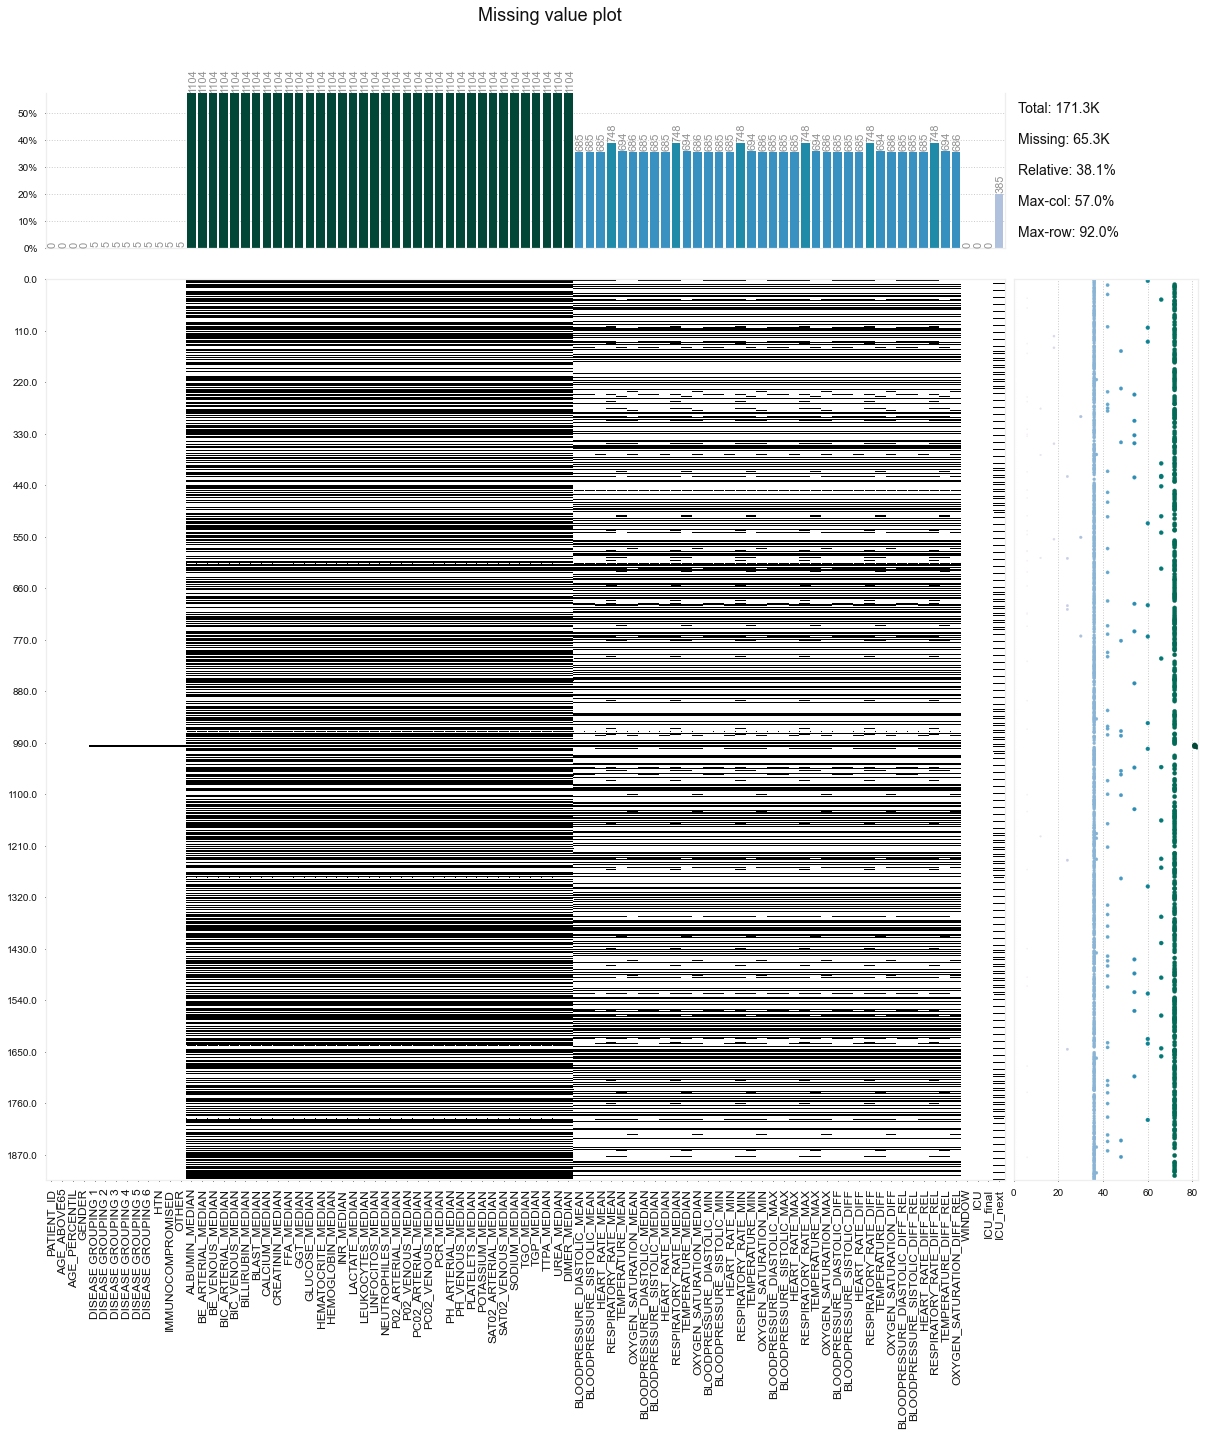

In [27]:
klib.missingval_plot(df)

#### From missing plot we see that there are 3 groups of columns by the percentage of missing values in them

In [28]:
df_basic = klib.drop_missing(df, drop_threshold_cols=0.2)
df_basic.head()

,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,1.0,1.0
4,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,NaN


#### 1st grop - basic columns with 0-20% missing values in them

In [29]:
cols_basic = df_basic.columns.to_list()
print(cols_basic)

['PATIENT_ID', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'WINDOW', 'ICU', 'ICU_final', 'ICU_next']


In [30]:
cols_target = df.iloc[1:, -3:].columns.to_list()
cols_target

['ICU', 'ICU_final', 'ICU_next']

#### 2nd grop - columns with 20% - 40% missing values in them

In [31]:
cols_mid_and_basic = klib.drop_missing(df, drop_threshold_cols=0.4).columns.to_list()
cols_mid = sorted(set(cols_mid_and_basic) - set(cols_basic))
len(cols_mid)
# cols_mid

36

#### 3nd grop - columns with 40%+ missing values in them

In [32]:
cols_last = sorted(set(df.columns) - set(cols_mid_and_basic))
len(cols_last)
# cols_last

36

#### Rows with 95% missing value or more

In [33]:
mask_missing_rows = data.isna().sum(1) / data.shape[1] > 0.95
index_missing_rows = data.loc[mask_missing_rows].index
df.loc[mask_missing_rows, cols_basic]

,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,WINDOW,ICU,ICU_final,ICU_next
995,199.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
996,199.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0
997,199.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0
998,199.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0
999,199.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN


In [34]:
df.drop(index=index_missing_rows, axis=0, inplace=True)

In [35]:
patient = lambda x: df.query(f'PATIENT_ID == {x}').loc[:, cols_basic]
patient(0)

,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,1.0,1.0
4,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,NaN


### Sum NAN counts over `WINDOW`

In [36]:
# helper function
def window_NaN_count(df_midx, number_patients=None):  
    """Greates a pandas.Dataframe with shape number of patients and columns dataframe from which to calculate.
    For each of the 5 windows the function makes a matrix of number of absent values and summs them up."""
    if number_patients is None:
        number_patients = df_midx.index.levels[0].shape[0]
    
    # get sure Nan values are type string
    df_midx = df_midx.fillna('NAN')
    matrix = pd.DataFrame(0, index=np.arange(number_patients), columns=df_midx.keys())
    
    for window in range(int(df.WINDOW.min()), int(df.WINDOW.max() + 1)):
        matrix_window = df_midx.loc[pd.IndexSlice[:, window], :].reset_index()
        NANmatrix     = matrix_window == 'NAN'
        matrix += NANmatrix.astype('int')
        
    return matrix

In [37]:
# window_NaN_count(df_midx=df_midx)

The plot shows by different colors how often a feature was not a number.

In [38]:
# lets see where are no missing values
df_nan = window_NaN_count(df_midx)
# df_nan[df_nan['ALBUMIN_MEDIAN'] == 5]

In [39]:
# df_midx.loc[pd.IndexSlice[287, :], 'OTHER':'LACTATE_MEDIAN']

___

<a id = 'preprocessing'></a>
# [<ins> Preprocessing</ins>](#content)

<a id='imputation'></a>
### [<ins>Missing value imputation</ins>](#content) 
It is important to understand the mechanisms by which missing fields are introduced in a dataset. Depending on the mechanism, we may choose to process the missing values differently. 
But let's try several basic methods first 

In [40]:
# Columns with the missing values
cols_missing = cols_mid + cols_last

In [41]:
patient = df.loc[:, cols_basic]
# patient

### Option 1: Mean/median imputation

In [42]:
def fillna_agg(df, method='mean'):
    if method == 'mean':
        operator = np.mean
    elif method == 'median':
        operator = np.median
    else:
        raise ValueError(f'invalid value {repr(method)} for mode argument. Valid values are: "mean", "median".')
        
    df_miss = df.groupby('PATIENT_ID')[cols_missing].apply(lambda x: x.fillna(x.mean()))
    df_miss.index = df_miss.index.droplevel([0])
    df_miss.sort_index(inplace=True)

    df_filled = df.copy()
    df_filled.loc[:, cols_missing] = df_miss
    return df_filled

In [43]:
%%time
df_miss = df.groupby('PATIENT_ID')[cols_missing].apply(lambda x: x.fillna(x.mean()))
df_miss.index = df_miss.index.droplevel([0])
df_miss.sort_index(inplace=True)

df_filled = df.copy()
df_filled.loc[:, cols_missing] = df_miss
df_filled.head()

Wall time: 4.65 s


,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.302632,-0.935829,-0.931937,-0.317073,-0.365854,-0.959009,-1.0,0.255102,-0.897381,-0.800640,-0.807243,-0.891993,-0.115304,-0.121951,-0.956085,0.018489,-0.799343,-0.779046,-0.868747,-0.268293,-0.467456,-0.827586,-0.785276,-0.937618,0.404255,0.378788,-0.506008,-0.592593,0.893939,0.635802,0.057143,-0.998134,-0.987424,-0.836123,-0.836145,-0.995837,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.302632,-0.935829,-0.931937,-0.317073,-0.365854,-0.959009,-1.0,0.255102,-0.897381,-0.800640,-0.807243,-0.891993,-0.115304,-0.121951,-0.956085,0.018489,-0.799343,-0.779046,-0.868747,-0.268293,-0.467456,-0.827586,-0.785276,-0.937618,0.404255,0.378788,-0.506008,-0.592593,0.893939,0.635802,0.057143,-0.998134,-0.987424,-0.836123,-0.836145,-0.995837,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.058911,-0.266692,-0.209375,-0.501433,0.044159,0.679641,0.045267,-0.279487,-0.201258,-0.517241,0.044643,0.671053,0.113402,-0.1625,-0.253561,-0.619048,0.335165,0.858586,-0.133903,-0.210811,-0.149254,-0.333333,-0.021739,0.750000,-0.77971,-0.558282,-0.628499,-0.607843,-0.809524,-0.954545,-0.796656,-0.530814,-0.743487,-0.634409,-0.810570,-0.953608,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.302632,-0.935829,-0.9

In [44]:
df.head()

,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,4.0,0.0,1.0,1.0
4,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.8

### Method fails when there are no values for all of 5 `WINDOW`s.

In [45]:
# df_filled = fillna_bffill(df)
# df[df_filled[cols_last[0]].isna()]

### Option 2: Forward / backward fill

Here we need to apply both fills as there are some edge cases that none of these methods covers on it's own

In [46]:
def fillna_bffill(df):
    df_miss = df.groupby('PATIENT_ID').apply(lambda x: x.fillna(method='bfill'))
    df_miss = df_miss.groupby('PATIENT_ID')[cols_missing].apply(lambda x: x.fillna(method='ffill'))
    df_miss.sort_index(inplace=True)

    df_filled = df.copy()
    df_filled.loc[:, cols_missing] = df_miss

    return df_filled

In [47]:
%%time
fillna_bffill(df).head()

Wall time: 300 ms


,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,-0.283951,-0.376923,-0.188679,-0.379310,-0.107143,0.736842,-0.340206,-0.4875,-0.572650,-0.857143,0.318681,0.898990,-0.076923,0.286486,0.298507,0.272727,-0.275362,0.736842,-0.33913,0.325153,0.114504,0.176471,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874

In [48]:
df.head()

,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,4.0,0.0,1.0,1.0
4,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.8

### Same problem applies to this method

In [49]:
# df_filled = fillna_bffill(df)
# df[df_filled[cols_last[0]].isna()]

### Option 3: expected value for a given `window` and `ICU` groups

In [50]:
def plot_avg_var_by_col(df, var, col='WINDOW', hue=None, degree=5):
    if hue:
        df_col_zero, df_col_one = avg_df_over_col(df, col, hue=hue)
        
        # Plot average value for hue == 0 (healthy)
        x, y = get_x_y(df_col_zero, var)
        plt.subplots()
        plot_var_by_col(x, y, var, col, degree, label=hue + f' {0}', color='green')
        
        # Plot average value for hue == 1 (sick)
        x, y = get_x_y(df_col_one, var)
        plot_var_by_col(x, y, var, col, degree, label=hue + f' {1}', color='red')
    else:
        df_mean = avg_df_over_col(df, col)
        x, y = get_x_y(df_mean, var)
        plt.subplots()
        plot_var_by_col(x, y, var, col, degree)
        
    return plt.gcf()

def avg_df_over_col(df, col='WINDOW', hue=None):
    if not hue:
        return df.groupby(col).agg('mean')
    else:
        df_col_zero = df.query(hue + ' == 0').groupby(col).agg('mean')
        df_col_one = df.query(hue + ' == 1').groupby(col).agg('mean')
        return df_col_zero, df_col_one
            
def get_x_y(df, var):
    x, y = [], []
    for i, j in df[var].items():
        x.append(i); y.append(j)
    return x, y

def plot_var_by_col(x, y, var, col, degree=5, label=None, color=None):
    coefs = np.polyfit(x, y, degree)
    x_pred = np.linspace(min(x), max(x), 160)
    y_pred = np.polyval(coefs, x_pred)
    
    plt.scatter(x, y, label=label, c=color)
    plt.plot(x_pred, y_pred, c=color)
    plt.ylabel(var)
    plt.xlabel(col)
    plt.title(f'Average {var} by {col}')
    plt.xticks(range(1, 6))
    plt.legend() 

In [51]:
import jutils
from jutils.html import Layout, HBox
from jutils.plot import Plot

### Let's see how well different variables (`ICU_*`, `GENDER`) separate attributes over `WINDOW`s 

In [52]:
var = 'RESPIRATORY_RATE_MEAN'
col = 'WINDOW'
degree = 3

p0 = plot_avg_var_by_col(df, var, col=col, degree=degree)

targets = cols_target + ['GENDER']
plots = [p0]
plots += [plot_avg_var_by_col(df, var, col=col, hue=target, degree=degree) for target in targets]


Layout('18em', [Plot(p) for p in plots])

# css = {'height':'20em', 'column-gap':'1em'}
# HBox([Plot(p) for p in plots], css=css)

No handles with labels found to put in legend.


In order to impute NaNs in test samples we can predict `ICU` label first and then use mean attribute value for respective window of the corresponding data `df.query('ICU == @y_pred')`.\
`ICU` seems to be a reasonable choice for target variable as it the easiest to predict.

In [53]:
# Columns with the missing values
cols_missing = cols_mid + cols_last

In [54]:
def generate_pseudo_label(df, model, target):
    # Check if any other target variables are in df and drop them to prevent overfitting
    other_targets_in_df = list(set(df.columns.to_list()) & set(cols_target))
    df.drop(other_targets_in_df, 1, inplace=True)
    try:
        df[target] = model.predict(df)
    except NameError:
        raise NameError(
            'Please define model "model_pseudo" to predict pseudolabels.')
    return df


def fillna_by_groups(x: pd.DataFrame, y=None, groups=None, target=False):
    if target:
        target = 'ICU_final'
        df = pd.concat([x, pd.DataFrame(y)], 1)

        # Check if target variable is in df
        if target not in df.columns:
            df = generate_pseudo_label(df, model_pseudo, target)

        target = [target]
    else:
        df = x.copy()
        target = []

    if groups is None:
        # Group by 3 categories (2 * 2 * 5 = 20 bins)
        groups = ['GENDER', 'OTHER', 'WINDOW']

    categories = target + groups
    df_miss = df.groupby(categories)[cols_missing].apply(lambda x: x.fillna(x.mean()))
    df_miss.index = df_miss.index.droplevel(list(range(len(categories))))
    df_miss.sort_index(inplace=True)
    x_filled = x.copy()
    x_filled.loc[:, cols_missing] = df_miss
    
    if target in list(x_filled):
        x_filled.drop(target, 1, inplace=True)
    
    return x_filled

In [55]:
%%time
df_filled = fillna_by_groups(df)
df_filled.head()

Wall time: 288 ms


,PATIENT_ID,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_final,ICU_next
0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.602309,-1.000000,-0.962817,-0.329019,-0.332006,-0.940733,-1.000000,0.320179,-0.864692,-0.718550,-0.926104,-0.841599,-0.058914,-0.088941,-0.939108,0.414548,-0.750069,-0.764269,-0.807377,-0.175709,-0.694240,-0.781140,-0.769500,-0.760218,0.220148,0.380025,-0.513092,-0.526455,0.922387,0.274628,-0.082410,-0.990422,-0.984188,-0.837418,-0.824637,-0.961942,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.000000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0,1.0,0.0
1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.568849,-1.000000,-0.958480,-0.322178,-0.315372,-0.943083,-0.976744,0.303987,-0.874330,-0.733302,-0.943294,-0.831709,-0.062040,-0.087254,-0.929416,0.524914,-0.766503,-0.767056,-0.824080,-0.171866,-0.719417,-0.783160,-0.763590,-0.756561,0.238496,0.382311,-0.540628,-0.552972,0.928823,0.254809,-0.135991,-0.994264,-0.986316,-0.825722,-0.816643,-0.960942,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.000000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,1.0,0.0
2,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.000000,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,-0.069759,-0.287438,-0.232665,-0.407068,0.110413,0.747580,-0.071903,-0.291040,-0.231952,-0.392698,0.109301,0.745614,0.073978,-0.067995,-0.128763,-0.321849,0.442821,0.899214,-0.326383,-0.476804,-0.380597,-0.458111,-0.082338,0.759064,-0.942284,-0.952943,-0.976601,-0.973702,-0.975929,-0.991695,-0.951580,-0.951510,-0.983175,-0.977030,-0.976211,-0.991720,3.0,0.0,1.0,0.0
3,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0

### check

In [56]:
# Average attribute values for groups as follows:
# df.groupby(['ICU_final', 'WINDOW']).agg('mean')['BLOODPRESSURE_DIASTOLIC_MEAN']
# df.groupby(['ICU_final', 'GENDER', 'WINDOW']).agg('mean')['BLOODPRESSURE_DIASTOLIC_MEAN'].head(20)

In [57]:
# df_filled = fillna_by_groups(df)
# df_filled.loc[:, cols_mid_and_basic].head()

In [58]:
# df.loc[:, cols_mid_and_basic].head()

In [59]:
# klib.missingval_plot(df_filled)

`df_filled` is a dataset without any missing values

### Function for preprosessing in `Agent.scan()`

In [60]:
def fillna(config, x, y=None):
    fillmode = config.get('fillna', False)

    fillmode_present = isinstance(fillmode, str)
    agg_method_present = isinstance(config.get('fillna_agg_method', None), str)
    groups_present = isinstance(config.get('fillna_groups', None), list)
    target_present = isinstance(config.get('fillna_target', None), int)
    present_args = any([fillmode_present, agg_method_present, groups_present, target_present])

    # print(f'using {repr(fillmode)} mode to fill missing values')
    if not present_args:
        pass
    elif fillmode == 'bffill':
        x = fillna_bffill(x)
    elif fillmode == 'agg' or agg_method_present:
        method = config.get('fillna_agg_method', 'mean')
        x = fillna_agg(x, method)
    elif fillmode == 'group' or target_present:
        groups = config.get('fillna_groups', None)
        target = config.get('fillna_target', 0)
        x = fillna_by_groups(x, y, groups=groups, target=target)
    return x

<a id="premodel"></a>
# [Base model](#content)

<a id="ICU_final"></a>

## [ICU_final](#content)
### OPTION 1: whether it will be necessary to send the patient to ICU *at all*. Target variable: `ICU_final`

In [61]:
from biva.agent import Agent
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [104]:
def drop_target_vars(x):
    targets = set(list(X)) & set(cols_target)
    return x.drop(targets, 1)

def preprocessing(config, *data):
    x, y = data
    x = fillna(config, x, y)
    x = drop_target_vars(x)
    return x, y

# Extract x and y
X = df.drop(cols_target, 1)
Y = df['ICU_final']

# Stratified K-Fold for model evaluation
n_splits = 16
sfold = StratifiedKFold(n_splits)
# XGB as base model
build_model_xgb = lambda x: XGBClassifier(**x, verbosity=0)

# Model for ICU_final
agent = Agent(X, Y, build_model=build_model_xgb, preprocessing=preprocessing, stratify=True, splitter=sfold, val_split=0.15, random_seed=0)

#### Base case. NaNs are not filled, no generated features, no dimentionality reduction

In [105]:
scorer = lambda y_true, y_pred: sklearn.metrics.fbeta_score(y_true, y_pred, beta=2.0)
# scorer = None

In [106]:
%%time
bi, va = agent.eval_model_cv(scorer=scorer)

16-StratifiedKFold Evaluation on 1632 samples.
                   | loss       | val_loss
---------------------------------------------
Average values:    | 9.9482e-01 | 8.5609e-01

Wall time: 3.06 s


#### Fill NaNs with backward + forward fill.

In [107]:
%%time
config = {'fillna': 'bffill'}
bi, va = agent.eval_model_cv(config=config, data_partitions='train', scorer=scorer)

16-StratifiedKFold Evaluation on 1632 samples.
                   | loss       | val_loss
---------------------------------------------
Average values:    | 1.0000e+00 | 9.5271e-01

Wall time: 3.78 s


#### Fill NaNs with grouping.

In [108]:
%%time
config  = {'fillna_target': 1, 'fillna_groups': ['GENDER', 'WINDOW']}
bi, va = agent.eval_model_cv(config=config, data_partitions='train', scorer=scorer)

16-StratifiedKFold Evaluation on 1632 samples.
                   | loss       | val_loss
---------------------------------------------
Average values:    | 1.0000e+00 | 9.6271e-01

Wall time: 2 s


#### Train on full data to create pseudo-label generator.

In [109]:
config = {'fillna': 'bffill'}
res, model_pseudo = agent.train_model_on(config=config, validate_on='test', scorer=scorer)

config  = {'fillna_target': 1, 'fillna_groups': ['GENDER', 'WINDOW']}
res, model_pseudo = agent.train_model_on(config=config, validate_on='test', scorer=scorer)

Training on 1632 samples, testing on 288 samples.
                     | loss       | val_loss
Training session: 1  | 1.0000e+00 | 7.1124e-01**
-----------------------------------------------
Average values:      | 1.0000e+00 | 7.1124e-01

Training on 1632 samples, testing on 288 samples.
                     | loss       | val_loss
Training session: 1  | 1.0000e+00 | 8.2313e-01**
-----------------------------------------------
Average values:      | 1.0000e+00 | 8.2313e-01



### Feature importances

In [110]:
feature_importances_all = {feature: imp for imp, feature in zip(model_pseudo.feature_importances_, X.columns)}
feature_importances_all = pd.json_normalize(feature_importances_all).T.sort_values(0, ascending=False).rename(columns={0: 'feature_import'})
feature_importances_all.head(20)

,feature_import
LACTATE_MEDIAN,0.352057
RESPIRATORY_RATE_MAX,0.162291
RESPIRATORY_RATE_MEDIAN,0.040729
RESPIRATORY_RATE_MEAN,0.023059
DISEASE GROUPING 5,0.022198
RESPIRATORY_RATE_DIFF,0.019256
WINDOW,0.016145
TEMPERATURE_DIFF,0.016112
BE_ARTERIAL_MEDIAN,0.013887
NEUTROPHILES_MEDIAN,0.013671


<a id="ICU_next"></a>

## [ICU_next](#content)
### OPTION 2: whether it will be necessary to send the patient to ICU during *next* WINDOW. Target variable `ICU_next`

In [111]:
mask = ~df.ICU.astype(bool)
df_next = df.loc[mask]
na_mask = df_next.loc[:, 'ICU_next'].isna()
missing_next = df_next.loc[na_mask, cols_basic + cols_mid]
# missing_next.query('ICU == 0 and WINDOW == 5')

# All the missing value are from window 5 and have ICU == 0. Let's assume patients stay stable down the line.
df_next.fillna(0, inplace=True)
klib.missingval_plot(df_next)

No missing values found in the dataset.


,ICU_next
0.0,0.883986
1.0,0.116014


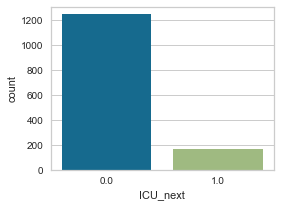

In [112]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(data=df_next, x='ICU_next', ax=ax)
target_count = (df_next['ICU_next'].value_counts() / df_next.shape[0]).to_frame()
target_count

In [113]:
def drop_target_vars(x):
    targets = set(list(X)) & set(cols_target)
    return x.drop(targets, 1)

def preprocessing(config, *data):
    x, y = data
    x = fillna(config, x, y)
    x = drop_target_vars(x)
    return x, y

In [114]:
X = df_next.drop(['ICU', 'ICU_next'], 1)
Y = df_next['ICU_next']


sfold = StratifiedKFold(16)
build_model_xgb = lambda x: XGBClassifier(**x, verbosity=0)

# Model for ICU_final
agent = Agent(X, Y, build_model=build_model_xgb, preprocessing=preprocessing, stratify=True, splitter=sfold, val_split=0.2, random_seed=0)

In [115]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [116]:
scorer = lambda y_true, y_pred: sklearn.metrics.fbeta_score(y_true, y_pred, beta=2.0)
# scoring = None

In [117]:
%%time
bi, va = agent.eval_model_cv(scorer=scorer)

16-StratifiedKFold Evaluation on 1124 samples.
                   | loss       | val_loss
---------------------------------------------
Average values:    | 9.7834e-01 | 8.7923e-02

Wall time: 2.03 s


#### Fill NaNs with backward + forward fill.

In [79]:
%%time
config = {'fillna': 'bffill'}
bi, va = agent.eval_model_cv(config=config, verbose=1, scorer=scorer)

16-StratifiedKFold Evaluation on 1124 samples.
                   | loss       | val_loss
---------------------------------------------
Average values:    | 9.7834e-01 | 8.7923e-02

Wall time: 1.96 s


#### Fill NaNs with grouping.

In [80]:
%%time
config  = {'fillna_target': 1, 'fillna_groups': ['GENDER', 'WINDOW']}
bi, va = agent.eval_model_cv(config=config, data_partitions='train', verbose=1, scorer=scorer)

16-StratifiedKFold Evaluation on 1124 samples.
                   | loss       | val_loss
---------------------------------------------
Average values:    | 9.7834e-01 | 8.7923e-02

Wall time: 1.97 s


#### Train model.

In [118]:
%%time
config = {'fillna': 'bffill'}
res, model = agent.train_model_on(config=config, validate_on='test', scorer=scorer)

config  = {'fillna_target': 1, 'fillna_groups': ['GENDER', 'WINDOW']}
res, model = agent.train_model_on(config=config, validate_on='test', scorer=scorer)

Training on 1124 samples, testing on 281 samples.
                     | loss       | val_loss
Training session: 1  | 9.6124e-01 | 1.0638e-01**
-----------------------------------------------
Average values:      | 9.6124e-01 | 1.0638e-01

Training on 1124 samples, testing on 281 samples.
                     | loss       | val_loss
Training session: 1  | 9.6124e-01 | 1.0638e-01**
-----------------------------------------------
Average values:      | 9.6124e-01 | 1.0638e-01

Wall time: 1.42 s


### Feature importances

In [119]:
feature_importances_all = {feature: imp for imp, feature in zip(model.feature_importances_, X.columns)}
feature_importances_all = pd.json_normalize(feature_importances_all).T.sort_values(0, ascending=False).rename(columns={0: 'feature_import'})
feature_importances_all.head(20)

,feature_import
PC02_VENOUS_MEDIAN,0.037202
DISEASE GROUPING 4,0.032232
P02_VENOUS_MEDIAN,0.028701
RESPIRATORY_RATE_MEDIAN,0.028653
PH_VENOUS_MEDIAN,0.025288
TEMPERATURE_DIFF_REL,0.023623
BILLIRUBIN_MEDIAN,0.022431
DIMER_MEDIAN,0.022276
BE_VENOUS_MEDIAN,0.021553
GLUCOSE_MEDIAN,0.021388


### Metrics

In [120]:
from biva.utils.plotters import plot_confusion_matrix, plot_metrics_per_threshold
from biva.utils.metrics import classification_metrics_by_threshold
from sklearn.metrics import confusion_matrix

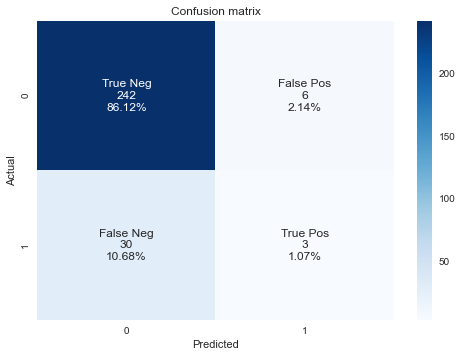

In [121]:
# Predict
y_true = agent.test_y
x_test, _ = preprocessing(config, agent.test_data, None)
y_pred = model.predict(x_test)

# Plot
cmat = confusion_matrix(y_true, y_pred)
plt.title('Confusion matrix')
plot_confusion_matrix(cmat)

**Context**

* **True positive** - Patient needs to go to ICU in the next period of time just as predicted. (*maximize*)
* **False positive** - Patient did not need to go to ICU, but we falsely predicted that he has to. **Waste of resouses and time**. (*minimize*)
* **False negative** - We predicted that patient doesn't need to go to ICU, but he actually needed ICU! **Dangerous!** (*minimize*)
* **True negative** -  We predicted that patient doesn't need to go to ICU, which was correct. (*maximize*)

##### F2 score is a good choice

#### Metrics by classification threshold

In [ ]:
# x_test, _ = preprocessing(config, agent.test_data, None)
# y_pred = model.predict_proba(x_test)[:, 1]

# plots = plot_metrics_per_threshold(y_true, y_pred)
# Layout('18em', [Plot(p) for p in plots])

<a id="fc"></a>
## [Feature cleaning](#content)

In [129]:
def drop_corr(config, x):
    return x.drop(config['drop_corr'], 1) if config.get('drop_corr', False) else x

def drop_target_vars(x):
    targets = set(list(X)) & set(cols_target)
    return x.drop(targets, 1)

def preprocessing(config, x, y):
    x = fillna(config, x, y)
    x = drop_corr(config, x)
    x = drop_target_vars(x)
    return x, y

X = df_next.drop(['ICU', 'ICU_next'], 1)
Y = df_next['ICU_next']

sfold = StratifiedKFold(32)
build_model_xgb = lambda x: XGBClassifier(**x, verbosity=0)

# Model for ICU_final
agent = Agent(X, Y, build_model=build_model_xgb, preprocessing=preprocessing, stratify=True, splitter=sfold, val_split=0.15)

In [130]:
from biva.agent import Mode

scorer = lambda y_true, y_pred: sklearn.metrics.fbeta_score(y_true, y_pred, beta=2.0)

config = {'fillna': 'bffill'}
params_drop_corr = [Mode('drop_corr', [False, cols_diff, cols_diff_rel])]

agent.scan('grid', params_drop_corr, config, data_partitions='train', strategy='max', scorer=scorer)

grid for Hyperparameter: drop_corr
Current configuration: {'fillna': bffill, 'drop_corr': False}
 Variance: -8.694657e-01, Bias: -9.970281e-01, HyperParams: {'drop_corr': False}, Time: 0:00:03
 Variance: -8.711104e-01, Bias: -9.970281e-01, HyperParams: {'drop_corr': ['BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 'OXYGEN_SATURATION_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']}, Time: 0:00:03
 Variance: -8.661318e-01, Bias: -9.969741e-01, HyperParams: {'drop_corr': ['BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL']}, Time: 0:00:03
Max. Variance: -8.711104e-01, Best HyperParams: {'drop_corr': ['BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 'OXYGEN_SATURATION_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']}, Time: 0:00:10

Best config: {'fillna': 'bffill', 'drop_corr': ['BLOODPRESSURE

(-0.8711104196301563,
 {'fillna': 'bffill',
  'drop_corr': ['BLOODPRESSURE_DIASTOLIC_DIFF',
   'BLOODPRESSURE_SISTOLIC_DIFF',
   'HEART_RATE_DIFF',
   'OXYGEN_SATURATION_DIFF',
   'RESPIRATORY_RATE_DIFF',
   'TEMPERATURE_DIFF']},
 None)


<a id="outliers"></a>
    
### [Outliers](#content)
TODO

<a id="rv"></a>

### [Rare values](#content)


TODO

<a id="fe"></a>
## [Feature engineering](#content)


<a id="fs"></a>

### [Feature scaling](#contnent)



<a id="discretize"></a>
### [Discretize](#content)

TODO

<a id="ftra"></a>

### [Feature transformation](#content)

TODO


<a id="fg"></a>

### [Feature generation](#content)

TODO


<a id="f_sel"></a>

## [Feature selection](#content)



<a id="hybrid"></a>

### [Hybrid method](#content)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,  roc_auc_score
from sklearn.feature_selection import RFE

## Missing values in "cleaned" dataset

In [ ]:
target_cols = df.iloc[1:, -3:].columns
target_cols

In [ ]:
y = df['ICU_final']

X_train, X_test, y_train, y_test = train_test_split(df.drop(target_cols, 1), 
                                                    y, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

#### [Recursive feature addition](#content)

with Random Forests Importance

In [ ]:
from xgboost import XGBClassifier 

In [ ]:
# 2018.12.02 Created by Eamon.Zhang

def recursive_feature_addition_rf(X_train,y_train,X_test,y_test,
                                  tol=0.001, max_depth=None,
                                  class_weight=None,
                                  top_n=15,n_estimators=50,random_state=0):
    
   
    features_to_keep = [X_train.columns[0]]
    count = 1
    
    # initial model using only one feature
    model_one_feature = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                      random_state=random_state,class_weight=class_weight, 
                                      n_jobs=-1)
    model_one_feature.fit(X_train[[X_train.columns[0]]], y_train)
    
    y_pred_test = model_one_feature.predict_proba(X_test[[X_train.columns[0]]])[:, 1]  
    auc_score_all = roc_auc_score(y_test, y_pred_test)
    
    for feature in X_train.columns[1:]:
        print()
        print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(X_train.columns))
        count += 1
        model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth, 
                              random_state=random_state,class_weight=class_weight, 
                              n_jobs=-1)
        
        # fit model with  the selected features and the feature to be evaluated
        model.fit(X_train[features_to_keep + [feature]], y_train)
        y_pred_test = model.predict_proba(X_test[features_to_keep + [feature]])[:, 1]    
        auc_score_int = roc_auc_score(y_test, y_pred_test)
        print('New Test ROC AUC={}'.format((auc_score_int)))
    
        # print the original roc-auc with all the features
        print('All features Test ROC AUC={}'.format((auc_score_all)))
    
        # determine the drop in the roc-auc
        diff_auc = auc_score_int - auc_score_all
    
        # compare the drop in roc-auc with the tolerance
        if diff_auc >= tol:
            # if the increase in the roc is bigger than the threshold
            # we keep the feature and re-adjust the roc-auc to the new value
            # considering the added feature
            print('Increase in ROC AUC={}'.format(diff_auc))
            print('keep: ', feature)
            auc_score_all = auc_score_int
            features_to_keep.append(feature)
        else:
            print('Increase in ROC AUC={}'.format(diff_auc))
            print('remove: ', feature)          

    print('DONE!!')
    print('total features to keep: ', len(features_to_keep))  
   
    return features_to_keep

### Not working cause of Nan

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# features_to_keep =recursive_feature_addition_rf(X_train=X_train,
#                                                 y_train=y_train,
#                                                 X_test=X_test,
#                                                 y_test=y_test,
#                                                 tol=0.0001, n_estimators=100)

In [ ]:
#  n_features_to_select decide the stopping criterion
# we stop till 10 features remaining

sel_ = RFE(RandomForestClassifier(n_estimators=20), n_features_to_select=20)
sel_.fit(X_train.fillna(0), y_train)

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]
print(selected_feat)

In [ ]:
my_features_to_keep = list(set(features_to_keep) | set(selected_feat))
my_features_to_keep

In [ ]:
data_x = X_copy[my_features_to_keep]
data_y = y


In [ ]:
data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(data_x, data_y, test_size=0.1, random_state = 10)
print(data_train_x.shape)
print(data_test_x.shape)

<a id='model'></a>
# [<ins>Model</ins>](#content)

## [XGBoost](#content)
TODO

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


In [ ]:
#Create a dataframe to store all the model outputs
model_output = pd.DataFrame(index=None, columns=['Model','Train_Accuracy', 'Test_Accuracy'])

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb_tunned=XGBClassifier(random_state=0)
grid=RandomizedSearchCV(xgb_tunned, param_distributions=params, cv=3, n_iter=20, n_jobs=-1, random_state=0)
grid.fit(data_train_x, np.ravel(data_train_y))

grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))


In [ ]:

xgb_tunned=XGBClassifier(**grid.best_params_, random_state=0)

xgb_tunned.fit(data_train_x, np.ravel(data_train_y))
pred_train = xgb_tunned.predict(data_train_x)
pred_test = xgb_tunned.predict(data_test_x)

print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))

train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)

print(classification_report(data_test_y, pred_test))

model_output = model_output.append(pd.Series({'Model' : 'XGBoost', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}), ignore_index=True)

model_output

In [ ]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(xgb_tunned, classes=[0,1], support=True)

visualizer.fit(data_train_x, data_train_y)  # Fit the visualizer and the model
visualizer.score(data_test_x, data_test_y)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
